TASK1: Download the dataset

In [1]:
import numpy as np
import seaborn as sns
sns.set()
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,accuracy_score,f1_score,hamming_loss,confusion_matrix,roc_auc_score

import warnings # to avoid warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
// to stop scrolling in cells

<IPython.core.display.Javascript object>

2. Load the dataset into the tool

In [3]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


3. Perform Below visualizations

3.1 Univariate Analysis

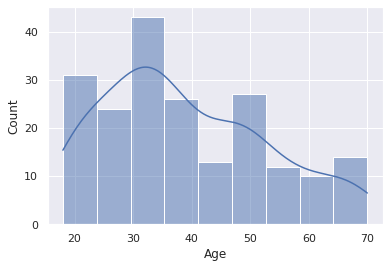

In [6]:
sns.histplot(df['Age'],kde=True)

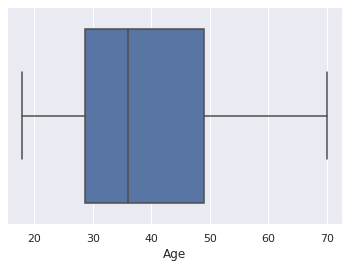

In [7]:
sns.boxplot(df['Age'],orient='h')

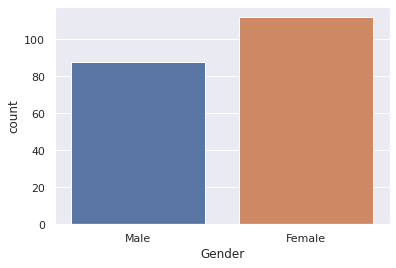

In [8]:
sns.countplot(x='Gender',data=df)

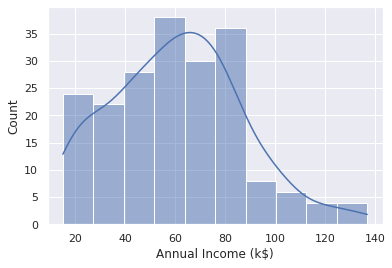

In [9]:
sns.histplot(df['Annual Income (k$)'], kde=True)

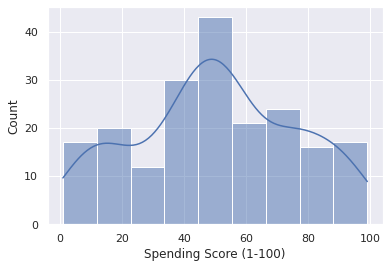

In [10]:
sns.histplot(df['Spending Score (1-100)'], kde=True)

3.2 Bi-Variate Analysis

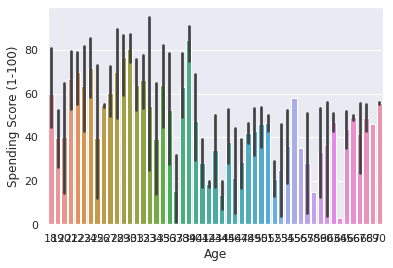

In [11]:
sns.barplot(x='Age',y='Spending Score (1-100)',data=df)

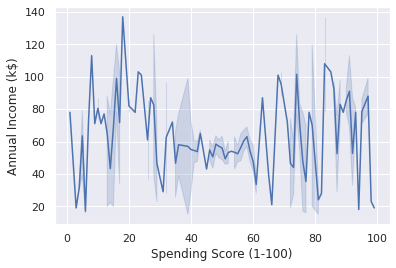

In [12]:
sns.lineplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df)

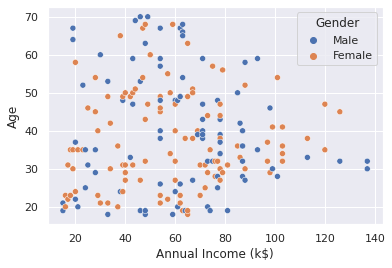

In [13]:
sns.scatterplot(x='Annual Income (k$)',y='Age',hue='Gender',data=df)

3.3 Multi-Variate Analysis

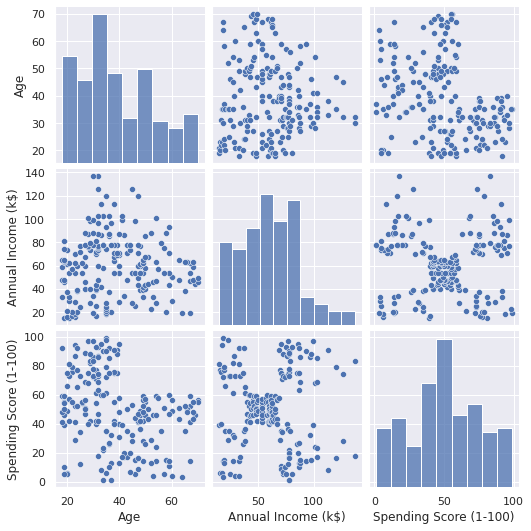

In [14]:
sns.pairplot(data=df[["Gender", "Age","Annual Income (k$)","Spending Score (1-100)"]])

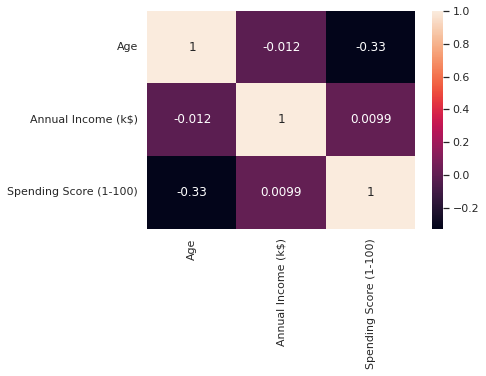

In [15]:
sns.heatmap(df.corr(),annot=True)

4. Perform descriptive statistics on the dataset

In [16]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


5. Check for Missing values and deal with them

In [17]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

6. Find the outliers and replace the outliers

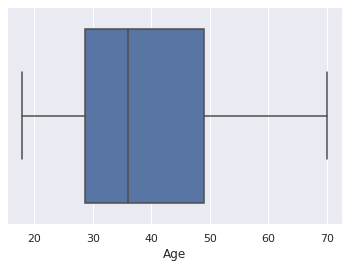

In [18]:
sns.boxplot(df['Age'], orient='h')

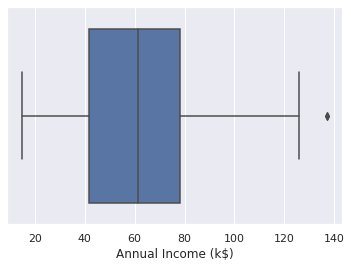

In [19]:
sns.boxplot(df['Annual Income (k$)'], orient='h')

In [20]:
q = df['Annual Income (k$)'].quantile(q=[0.75,0.25])
iqr=q.iloc[0]-q.iloc[1]
lower = q.iloc[1] - 1.5*iqr
upper = q.iloc[0] + 1.5*iqr

In [21]:
df['Annual Income (k$)'] = np.where(df['Annual Income (k$)']>upper,upper,np.where(df['Annual Income (k$)']<lower,lower,df['Annual Income (k$)']))

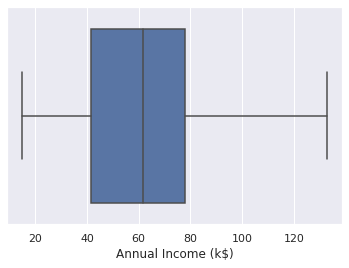

In [22]:
sns.boxplot(df['Annual Income (k$)'], orient='h')

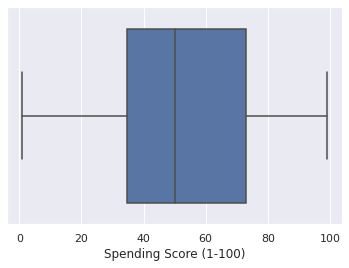

In [23]:
sns.boxplot(df['Spending Score (1-100)'], orient='h')

7. Check for Categorical columns and perform encoding

In [24]:
l_en = LabelEncoder()

In [25]:
df['Gender'] = l_en.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


8. Scaling the data

In [26]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_data[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

9. Perform any of the clustering algorithms

In [27]:
from sklearn.cluster import KMeans
km = KMeans(algorithm='elkan',n_init=100, max_iter=3000)
res = km.fit_predict(scaled_data)
res

array([6, 6, 7, 7, 7, 7, 1, 7, 0, 7, 0, 7, 1, 7, 3, 6, 7, 6, 0, 7, 6, 6,
       1, 6, 1, 6, 1, 6, 1, 7, 0, 7, 0, 6, 1, 7, 1, 7, 1, 7, 1, 6, 0, 7,
       1, 7, 1, 7, 7, 7, 1, 6, 7, 0, 1, 0, 1, 0, 7, 0, 0, 6, 1, 1, 0, 6,
       1, 1, 6, 7, 0, 1, 1, 1, 0, 6, 1, 6, 7, 1, 0, 6, 0, 1, 7, 0, 1, 7,
       7, 1, 1, 6, 0, 1, 7, 6, 1, 7, 0, 6, 7, 1, 0, 6, 0, 7, 1, 0, 0, 0,
       0, 7, 1, 6, 7, 7, 1, 1, 1, 1, 6, 1, 4, 2, 7, 4, 3, 2, 0, 2, 3, 2,
       7, 4, 3, 4, 5, 2, 3, 4, 5, 2, 7, 4, 3, 2, 0, 4, 5, 2, 3, 2, 5, 4,
       5, 4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 5, 2, 3, 2, 3, 2, 5, 4,
       0, 2, 0, 2, 5, 4, 3, 4, 5, 2, 5, 2, 5, 4, 5, 4, 3, 4, 5, 4, 5, 2,
       3, 2], dtype=int32)

In [28]:
df1 = pd.DataFrame(scaled_data, columns = df.columns)
df1.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


10. Add the cluster data with the primary dataset

In [29]:
df1['Cluster']  = pd.Series(res)
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1.0,0.019231,0.000000,0.387755,6
1,1.0,0.057692,0.000000,0.816327,6
2,0.0,0.038462,0.008493,0.051020,7
3,0.0,0.096154,0.008493,0.775510,7
4,0.0,0.250000,0.016985,0.397959,7


In [30]:
df1['Cluster'].unique()

array([6, 7, 1, 0, 3, 4, 2, 5], dtype=int32)

In [31]:
df1['Cluster'].value_counts()

1    38
7    37
0    29
6    24
4    22
2    18
3    17
5    15
Name: Cluster, dtype: int64

11. Split the data into dependent and independent variables

In [32]:
# independent variable
X = df1.iloc[:,0:4]
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [33]:
# dependent variable
y = df1.iloc[:,4:]
y.head()

,Cluster
0,6
1,6
2,7
3,7
4,7


12. Split the data into training and testing

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.424628,0.428571
67,0.0,0.961538,0.280255,0.479592
78,0.0,0.096154,0.331210,0.520408
42,1.0,0.576923,0.203822,0.357143
17,1.0,0.038462,0.050955,0.663265


In [35]:
X_test.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.263270,0.510204
40,0.0,0.903846,0.195329,0.346939
34,0.0,0.596154,0.152866,0.132653
102,1.0,0.942308,0.399151,0.591837
184,0.0,0.442308,0.713376,0.387755


In [36]:
y_train.head()

,Cluster
116,1
67,1
78,7
42,0
17,6


In [37]:
y_test.head()

,Cluster
58,7
40,1
34,1
102,0
184,5


13. Build the model

In [38]:
# classification algorithm
classifier_model = SVC(decision_function_shape='ovo')

14. Train the model

In [39]:
classifier_model.fit(X_train,y_train.values.flatten())

SVC(decision_function_shape='ovo')

15. Test the model

In [40]:
pred_y = classifier_model.predict(X_test)
pred_y[0:5]

array([7, 1, 1, 0, 5], dtype=int32)

16. Measure the performance using Evaluation Metrics

In [41]:
print('Classification Report: ')
print(classification_report(y_test, pred_y))

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00        15

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60



Confusion Matrix: 


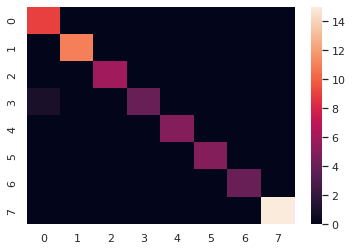

In [42]:
print('Confusion Matrix: ')
sns.heatmap(confusion_matrix(y_test,pred_y))

In [43]:
print('F1 Score: ',f1_score(y_test,pred_y, average='weighted'))

F1 Score:  0.9828460038986354


In [44]:
# Hamming loss gives the fraction of labels that are incorrectly predicted
print('Hamming Loss: ',hamming_loss(y_test,pred_y))

Hamming Loss:  0.016666666666666666


In [45]:
print('Accuracy: ',accuracy_score(y_test,pred_y))

Accuracy:  0.9833333333333333
